In [ ]:
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np
import random
import time

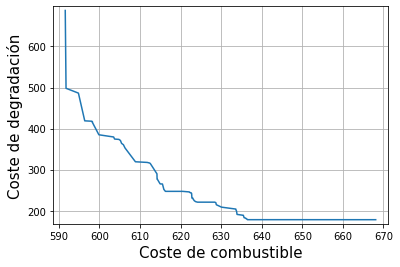

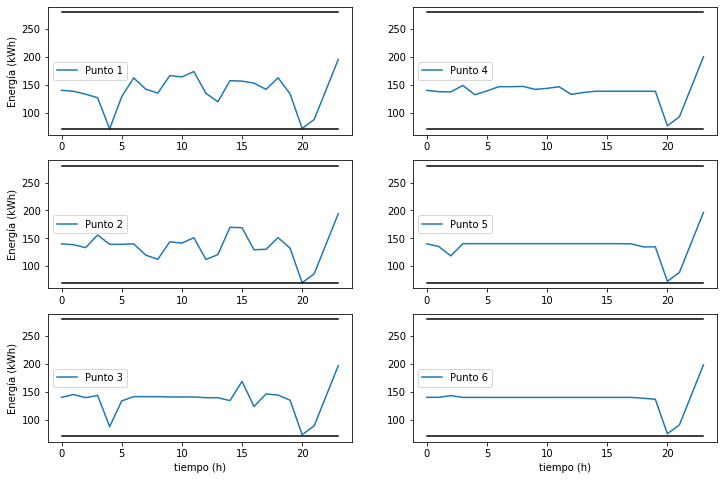

In [ ]:
with open('individuos_microrred_multi.txt', 'r') as f_ind:
    lines_ind = list(f_ind)

with open('fitness_microrred_multi.txt', 'r') as f_fit:
    f_fitness = f_fit.read()
    f_fitness = [f.split(',') for f in f_fitness.split('\n')]

combustible_fitness = np.array([float(n[1]) for n in f_fitness])
bateria_fitness = np.array([float(n[2]) for n in f_fitness])

plt.plot(combustible_fitness, bateria_fitness)
plt.grid(True)
plt.xlim([min(combustible_fitness)-3, max(combustible_fitness)+3])
plt.xlabel('Coste de combustible', fontsize = 15)
plt.ylim([min(bateria_fitness)-10, max(bateria_fitness)+10])
plt.ylabel('Coste de degradación', fontsize = 15)

def evolucion_SOC(P_ESS, SOC_ini):
    Delta_t = 1
    SOC = np.zeros(24)
    SOC[0] = SOC_ini
    for i in range(1, SOC.size):
        SOC[i] = SOC[i-1] - P_ESS[i]*Delta_t
    return SOC

points =[[0.0, 14.359244944412351, 26.764886278992627, 0.0, 0.0, 16.33154168506647, 32.91445084770683, 0.0, 12.63647452415178, 0.0, 0.0, 30.741057996020977, 0.0, 0.0, 0.0, 0.0, 76.37064507740942, 0.0, 45.070218373134374, 55.82613503717452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 56.46685991603426, 0.0, 120.70418569281017, 106.83391154331999, 118.72441919718798, 130.25591800808277, 176.44536834787323, 158.59603441195932, 140.0, 99.88232803407627, 120.76171875945658, 132.90817627725076, 94.27465214113849, 0.0, 87.67673014500807, 118.9466233285784, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 14.359244944412351, 26.764886278992627, 29.29268423693798, 39.21800315509471, 12.091106728181371, 0.0, 0.0, 12.63647452415178, 0.0, 0.0, 30.741057996020977, 0.0, 15.23828124054342, 11.21222769360136, 0.0, 40.39570791493672, 18.935266872454275, 45.070218373134374, 65.92715067605626, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 56.46685991603426, 0.0, 66.90889327181863, 106.83391154331999, 118.72441919718798, 129.91103083963836, 176.44536834787323, 158.59603441195932, 140.0, 99.88232803407627, 129.48601292455086, 132.90817627725076, 94.27465214113849, 0.0, 80.7780918607393, 118.9466233285784, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 20.915826859236653, 26.473713928751742, 0.0, 0.0, 13.05897619680913, 19.009747414381437, 22.618661557097347, 18.58475129774956, 16.596429121057056, 40.962642550787855, 57.364778586427555, 37.80838428570654, 6.51398707544913, 0.0, 32.18520262985962, 34.87240269366384, 40.65831991093756, 19.00618757472425, 16.368662734103605, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.94080005580813, 0.0, 112.14848680121136, 94.66067971874935, 116.38133844290266, 131.41524870225044, 127.81995524646129, 120.03735744921215, 103.63522141357245, 99.88232803407627, 129.48601292455086, 89.77833722923108, 97.36830740573134, 0.0, 80.7780918607393, 122.05878765265629, 59.38643091571734, 0.0, 0.0, 0.0, 0.0],
         [0.0, 13.59132962480127, 31.561487234621517, 19.058022425493803, 39.21800315509471, 12.091106728181371, 13.883845227752495, 22.618661557097347, 19.08783460285003, 25.7293849515765, 54.82580674522171, 0.0, 0.0, 0.0, 15.070299752911108, 40.320305073443414, 34.87240269366384, 31.137516407444213, 17.53846873279277, 14.401339254529173, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 55.653727081215806, 0.0, 73.83021982919072, 99.69161912451325, 116.38133844290266, 131.41524870225044, 113.91119467770969, 108.00233647084977, 163.87489392382346, 125.36372236607966, 139.2472386710156, 82.2581806231419, 54.679694926556586, 45.12759730633616, 67.86248359255579, 125.46153126720723, 70.59866074547082, 0.0, 0.0, 0.0, 0.0],
         [0.0, 11.20294419692458, 15.14269840444773, 29.29268423693798, 8.928162049869789, 12.131282399372408, 13.883845227752495, 22.618661557097347, 18.58475129774956, 16.596429121057056, 40.962642550787855, 57.364778586427555, 37.80838428570654, 6.51398707544913, 15.070299752911108, 40.320305073443414, 34.87240269366384, 30.847709410689653, 5.6518332801924736, 33.53876344793014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 55.653727081215806, 47.07183795013021, 66.86871760062759, 92.11615477224751, 116.38133844290266, 131.41524870225044, 128.40357087894296, 120.03735744921215, 103.63522141357245, 101.19161571429346, 129.48601292455086, 79.92970024708889, 54.679694926556586, 45.12759730633616, 67.86248359255579, 131.8564210881074, 51.46123655206986, 0.0, 0.0, 0.0, 0.0],
         [0.0, 15.997608381530902, 15.14269840444773, 29.29268423693798, 8.928162049869789, 12.091106728181371, 13.883845227752495, 22.618661557097347, 18.58475129774956, 16.596429121057056, 40.962642550787855, 57.364778586427555, 37.80838428570654, 6.51398707544913, 15.070299752911108, 40.320305073443414, 34.87240269366384, 31.137516407444213, 17.53846873279277, 14.401339254529173, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.88788183408278, 30.53644172567354, 47.07183795013021, 66.86871760062759, 92.11615477224751, 116.38133844290266, 131.41524870225044, 128.40357087894296, 120.03735744921215, 103.66380400244181, 101.19161571429346, 129.48601292455086, 79.92970024708889, 54.679694926556586, 45.12759730633616, 67.86248359255579, 123.99381242527575, 68.63133726589639, 0.0, 0.0, 0.0, 0.0]]

t = np.arange(0,24)
P_PV = np.array([0, 0, 0, 0, 0, 0, 0, 0, 6, 10, 15, 20, 30, 40, 40, 20, 15, 10, 8, 2, 0, 0, 0, 0])
P_WT = np.array([51, 51, 58, 51, 64, 51, 44, 51, 44, 51, 51, 46, 81, 74, 65, 65, 65, 51, 39, 63, 38, 66, 74, 74])
P_DM = np.array([67, 67, 90, 114, 120, 130, 150, 190, 200, 206, 227, 227, 250, 250, 200, 180, 160, 160, 190, 150, 100, 50, 20, 20])

SOC_ESS_max = 280
SOC_ESS_min = 70
SOC_ini = 140

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))
num = 1
cont = 0
cont2 = 0
for p in points:
    P_DE = p[:24]
    P_MT = p[24:]
    P_ESS = P_DM - P_PV - P_WT - P_DE - P_MT
    SOC = evolucion_SOC(P_ESS, SOC_ini)
    
    axes[cont,cont2].plot(t, SOC, label = 'Punto %i' %num)
    axes[cont,cont2].plot(t, np.ones(24)*SOC_ESS_max, 'k')
    axes[cont,cont2].plot(t, np.ones(24)*SOC_ESS_min, 'k')
    axes[cont,cont2].set_ylim([SOC_ESS_min-10, SOC_ESS_max + 10])
    axes[cont,cont2].legend()
    if cont2 == 0:
        axes[cont,cont2].set_ylabel('Energía (kWh)')
    if cont == 2:
        axes[cont,cont2].set_xlabel('tiempo (h)')
        
        
    cont += 1
    num += 1
    if cont == 3:
        cont = 0
        cont2 += 1


In [ ]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")

    ax1.fill_between(gen, fit_mins, fit_maxs, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)

6.751679182052612


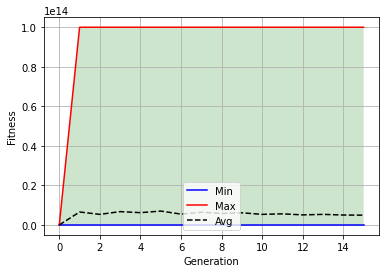

In [ ]:
t0 = time.time()
t = np.arange(0, 24)
P_PV = np.array([0, 0, 0, 0, 0, 0, 0, 0, 6, 10, 15, 20, 
                 30, 40, 40, 20, 15, 10, 8, 2, 0, 0, 0, 0])
P_WT = np.array([51, 51, 58, 51, 64, 51, 44, 51, 44, 51, 51, 46, 
                 81, 74, 65, 65, 65, 51, 39, 63, 38, 66, 74, 74])

P_DM = np.array([67, 67, 90, 114, 120, 130, 150, 190, 200, 206, 227, 227, 250, 250, 200, 180, 160, 160, 190, 150, 100, 50, 20, 20])
P_dem = P_DM - P_PV - P_WT
# Generador diesel
P_DE_min = 5
P_DE_max = 80
# Microturbina
P_MT_min = 10
P_MT_max = 140

P_ESS_min = -120
P_ESS_max = 120
SOC_ESS_max = 280
SOC_ESS_min = 70
SOC_ini = 140

penaliza = 99999999999999


def evalua_despachable(P_DE, P_MT):
    for p in P_DE:
        if p < P_DE_min and p != 0:
            return penaliza
    if any(P_DE) > P_DE_max:
        return penaliza
    for p in P_MT:
        if p < P_MT_min and p != 0:
            return penaliza
    if any(P_MT) > P_MT_max:
        return penaliza
    return 0

# Generador diesel
def coste_DE(P_DE):
    f_DE = 0.0012
    e_DE = 0.2455
    d_DE = 1.925
    if (P_DE == 0):
        return 0
    else:
        return d_DE + e_DE*P_DE + f_DE*(P_DE**2) 

# Microturbina
def coste_MT(P_MT):
    f_MT = 0.0002
    e_MT = 0.2015
    d_MT = 7.4344
    if (P_MT == 0):
        return 0
    else:
        return d_MT + e_MT*P_MT + f_MT*(P_MT**2) 


def evolucion_SOC(P_ESS, SOC_ini):
    Delta_t = 1
    SOC = np.zeros(24)
    SOC[0] = SOC_ini
    for i in range(1, SOC.size):
        SOC[i] = SOC[i-1] - P_ESS[i]*Delta_t
    return SOC


def evalua_ESS(P_ESS, SOC):
    if any(P_ESS < P_ESS_min):
        return penaliza
    if any(P_ESS > P_ESS_max):
        return penaliza
    if any(SOC < SOC_ESS_min):
        return penaliza
    if any(SOC > SOC_ESS_max):
        return penaliza
    return 0


def crea_individuo():
# Creación de individuos iniciales
    individuo = np.zeros(48)
    for i in range(0,24):
        individuo[i] = random.uniform(P_DE_min,min(P_dem[i],P_DE_max))
        if P_dem[i] < 0:
            individuo[i] = 0
        individuo[24+i] = P_dem[i] - individuo[i]
        if individuo[24+i] < P_MT_min:
            individuo[24+i] = 0
        if individuo[24+i] > P_MT_max:
            individuo[24+i] = P_MT_max
    return individuo


def mutacion(individuo, indpb):
    for j, i in enumerate(individuo):
        if random.random() < indpb[0]:
            individuo[j] = random.gauss(individuo[j],30)
        if random.random() < indpb[1]:
            individuo[j] = 0
    return individuo,


def fitness(individuo):
    # Calculamos los valores de potencia
    P_DE = individuo[:24]
    P_MT = individuo[24:]
    P_ESS = P_DM - P_PV - P_WT - P_DE - P_MT
    # Evaluamos generadores despachables
    if evalua_despachable(P_DE, P_MT) == penaliza:
        return penaliza+1,
    # Calculamos la evolucion del estado de carga y la evaluamos
    SOC = evolucion_SOC(P_ESS, SOC_ini)
    if evalua_ESS(P_ESS, SOC) == penaliza:
        return penaliza+2,
    # Finalmente, si todas las restricciones se cumplen se calcula el coste
    coste = 0
    for i in range(0, 24):
        coste += coste_DE(P_DE[i])
        coste += coste_MT(P_MT[i])
    return coste,


def unico_objetivo_ga(NGEN, MU, CXPB, MUTPB, toolbox):

    LAMBDA = MU 

    pop = toolbox.ini_poblacion(n = MU)
    hof = tools.HallOfFame(1, similar = np.array_equal)
 
    stats = tools.Statistics(key = lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
   
    logbook = tools.Logbook()
   
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN,
                              stats= stats, halloffame=hof, verbose = False)
   
    return pop, hof, logbook


creator.create("FitnessMin", base.Fitness, weights = (-1,))
creator.create("Individual", np.ndarray, fitness = creator.FitnessMin)
 
toolbox = base.Toolbox() 
toolbox.register("individual", tools.initIterate, creator.Individual, crea_individuo)
toolbox.register("ini_poblacion", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutacion, indpb = (0.05, 0.05))
toolbox.register("select", tools.selTournament, tournsize = 3)

pop_new, pareto_new, log = unico_objetivo_ga(15, 1500, 0.7, 0.3, toolbox)
t1 = time.time()
print(t1-t0)
plot_evolucion(log)

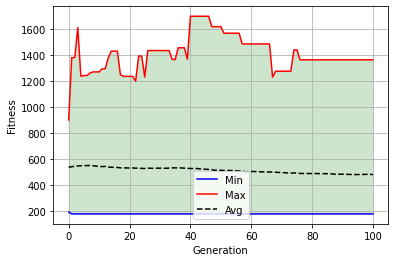

In [ ]:
t = np.arange(0, 24)
P_PV = np.array([0, 0, 0, 0, 0, 0, 0, 0, 6, 10, 15, 20, 30, 40, 40, 20, 15, 10, 8, 2, 0, 0, 0, 0])
P_WT = np.array([51, 51, 58, 51, 64, 51, 44, 51, 44, 51, 51, 46, 81, 74, 65, 65, 65, 51, 39, 63, 38, 66, 74, 74])

P_DM = np.array([67, 67, 90, 114, 120, 130, 150, 190, 200, 206, 227, 227, 250, 250, 200, 180, 160, 160, 190, 150, 100, 50, 20, 20])
P_dem = P_DM - P_PV - P_WT
# Generador diesel
P_DE_min = 5
P_DE_max = 80
# Microturbina
P_MT_min = 10
P_MT_max = 140

P_ESS_min = -120
P_ESS_max = 120
SOC_ESS_max = 280
SOC_ESS_min = 70
SOC_ini = 140

penaliza = 99999999999999


def evalua_despachable(P_DE, P_MT):
    for p in P_DE:
        if p < P_DE_min and p != 0:
            return penaliza
    if any(P_DE) > P_DE_max:
        return penaliza
    for p in P_MT:
        if p < P_MT_min and p != 0:
            return penaliza
    if any(P_MT) > P_MT_max:
        return penaliza
    return 0


# Generador diesel
def coste_DE(P_DE):
    f_DE = 0.0012
    e_DE = 0.2455
    d_DE = 1.925
    if (P_DE == 0):
        return 0
    else:
        return d_DE + e_DE*P_DE + f_DE*(P_DE**2) 


# Microturbina
def coste_MT(P_MT):
    f_MT = 0.0002
    e_MT = 0.2015
    d_MT = 7.4344
    if (P_MT == 0):
        return 0
    else:
        return d_MT + e_MT*P_MT + f_MT*(P_MT**2) 


def evolucion_SOC(P_ESS, SOC_ini):
    Delta_t = 1
    SOC = np.zeros(24)
    SOC[0] = SOC_ini
    for i in range(1, SOC.size):
        SOC[i] = SOC[i-1] - P_ESS[i]*Delta_t
    return SOC


def evalua_ESS(P_ESS, SOC):
    if any(P_ESS < P_ESS_min):
        return penaliza
    if any(P_ESS > P_ESS_max):
        return penaliza
    if any(SOC < SOC_ESS_min):
        return penaliza
    if any(SOC > SOC_ESS_max):
        return penaliza
    return 0


def crea_individuo():
    """Función que crea individuos"""
    individuo = np.zeros(48)
    for i in range(0,24):
        individuo[i] = random.uniform(P_DE_min,min(P_dem[i],P_DE_max))
        if P_dem[i] < 0:
            individuo[i] = 0
        individuo[24+i] = P_dem[i] - individuo[i]
        if individuo[24+i] < P_MT_min:
            individuo[24+i] = 0
        if individuo[24+i] > P_MT_max:
            individuo[24+i] = P_MT_max
    return individuo


def mutacion(individuo, indpb):
    """Mutación Gaussiana"""
    for j, i in enumerate(individuo):
        if random.random() < indpb[0]:
            individuo[j] = random.gauss(individuo[j],30)
        if random.random() < indpb[1]:
            individuo[j] = 0
    return individuo,


def fitness(individuo):
    # Calculamos los valores de potencia
    P_DE = individuo[:24]
    P_MT = individuo[24:]
    P_ESS = P_DM - P_PV - P_WT - P_DE - P_MT
    # Evaluamos generadores despachables
    if evalua_despachable(P_DE, P_MT) == penaliza:
        return penaliza, penaliza
    # Calculamos la evolucion del estado de carga y la evaluamos
    SOC = evolucion_SOC(P_ESS, SOC_ini)
    if evalua_ESS(P_ESS, SOC) == penaliza:
        return penaliza, penaliza
    # Finalmente, si todas las restricciones se cumplen se calcula el coste
    coste_combustible = 0
    for i in range(0, 24):
        coste_combustible += coste_DE(P_DE[i])
        coste_combustible += coste_MT(P_MT[i])
    coste_ESS = np.sum(np.abs(SOC-SOC_ini))
    return coste_combustible, coste_ESS


def multiple_objetivo_ga(NGEN, MU, CXPB, MUTPB, toolbox):

    LAMBDA = MU 
   
    pop = toolbox.ini_poblacion(n = MU)
    pareto = tools.ParetoFront(similar = np.array_equal)
 
    stats = tools.Statistics(key = lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
   
    logbook = tools.Logbook()
   
    pop, logbook = algorithms.eaMuPlusLambda(
        pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN,
        stats= stats, halloffame=pareto, verbose = False
    )
   
    return pop, pareto, logbook


creator.create("FitnessMin", base.Fitness, weights = (-1.0, -1.0))
creator.create("Individual", np.ndarray, fitness = creator.FitnessMin) 

toolbox = base.Toolbox()

toolbox.register("individual", tools.initIterate, creator.Individual, crea_individuo)
toolbox.register("ini_poblacion", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", mutacion, indpb=(0.05, 0.05))
toolbox.register("select", tools.selNSGA2)

pop, pareto, log = multiple_objetivo_ga(100, 3000, 0.7, 0.3, toolbox)

with open("individuos_microrred_multi.txt", "a") as res_individuos:
    with open("fitness_microrred_multi.txt", "a") as res_fitness:

        for ide, ind in enumerate(pareto):
            res_individuos.write(str(ide))
            res_individuos.write(",")
            res_individuos.write(str(list(ind)))
            res_individuos.write("\n")
            res_fitness.write(str(ide))
            res_fitness.write(",")
            res_fitness.write(str(ind.fitness.values[0]))
            res_fitness.write(",")
            res_fitness.write(str(ind.fitness.values[1]))
            res_fitness.write("\n")

plot_evolucion(log)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>